In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [2]:
#importing boston dataset
df= pd.read_csv("Boston.csv")

In [3]:
df.head()

,Crime Rate,Residential Proportion,non-retail business acres/Town,Charles River,NO2 concentration,Average Rooms/Dwelling.,Prior Built Units Proportion,Distance to Employment Centres,Radial Highways Distance,ValueProperty/tax rate,Teacher/town,blacks/town,Lower Status Percent,median home price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
#checking number of rows and columns
df.shape

(506, 14)

In [5]:
df.isnull().sum()

Crime Rate                        0
Residential Proportion            0
non-retail business acres/Town    0
Charles River                     0
NO2 concentration                 0
Average Rooms/Dwelling.           0
Prior Built Units Proportion      0
Distance to Employment Centres    0
Radial Highways Distance          0
ValueProperty/tax rate            0
Teacher/town                      0
blacks/town                       0
Lower Status Percent              0
median home price                 0
dtype: int64

In [6]:
#statistical measure
df.describe()

,Crime Rate,Residential Proportion,non-retail business acres/Town,Charles River,NO2 concentration,Average Rooms/Dwelling.,Prior Built Units Proportion,Distance to Employment Centres,Radial Highways Distance,ValueProperty/tax rate,Teacher/town,blacks/town,Lower Status Percent,median home price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Checking correlation between various features

In [8]:
correaltion = df.corr()

<Axes: >

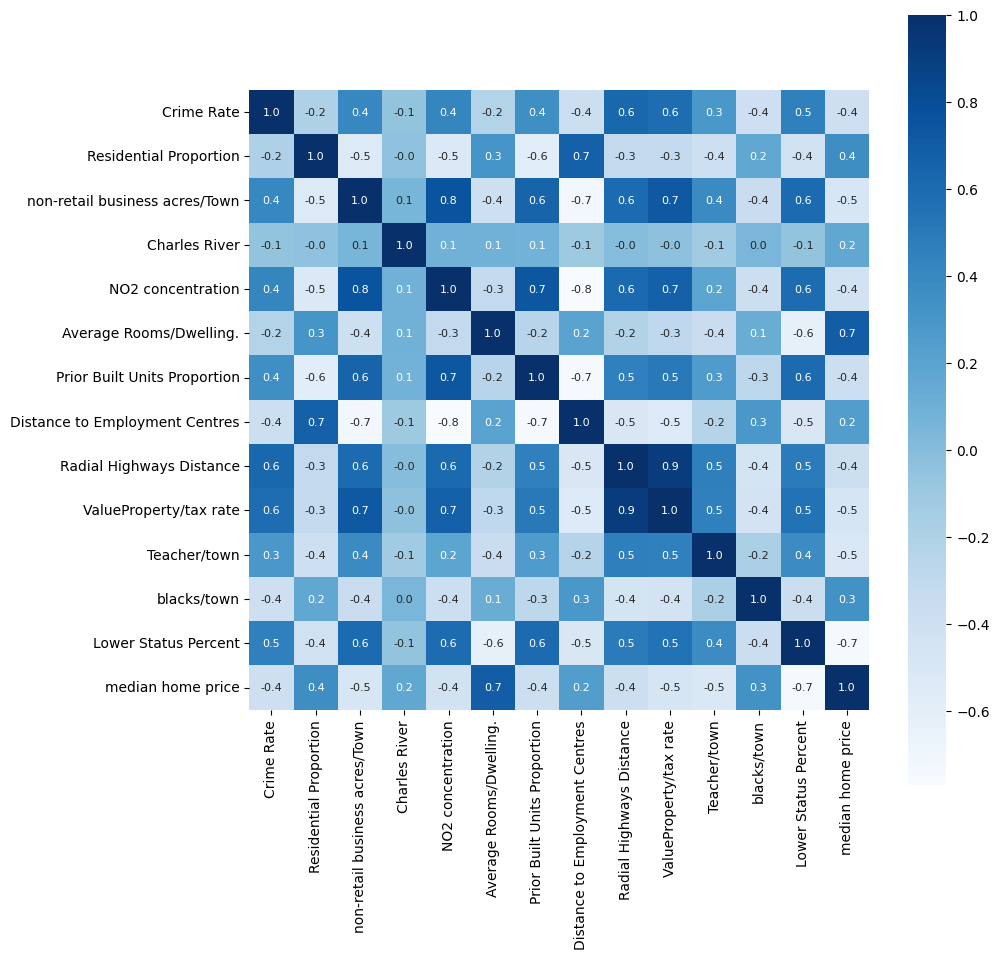

In [10]:
#heatmap

plt.figure(figsize=(10,10))
sns.heatmap(correaltion,cbar= True,square = True, fmt= '.1f',annot= True, annot_kws= {'size':8},cmap='Blues')

In [11]:
# split data and target

X= df.drop(['median home price'],axis=1)
Y= df['median home price']

In [12]:
print(X)
print(Y)

     Crime Rate  Residential Proportion  non-retail business acres/Town  \
0       0.00632                    18.0                            2.31   
1       0.02731                     0.0                            7.07   
2       0.02729                     0.0                            7.07   
3       0.03237                     0.0                            2.18   
4       0.06905                     0.0                            2.18   
..          ...                     ...                             ...   
501     0.06263                     0.0                           11.93   
502     0.04527                     0.0                           11.93   
503     0.06076                     0.0                           11.93   
504     0.10959                     0.0                           11.93   
505     0.04741                     0.0                           11.93   

     Charles River  NO2 concentration  Average Rooms/Dwelling.  \
0              0.0              0

In [13]:
#split train and test data

X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2, random_state=2)

In [14]:
print(X.shape,X_train.shape,X_test.shape)

(506, 13) (404, 13) (102, 13)


In [15]:
# Model training
# XGBoost Regressor
#load model

model = XGBRegressor()



In [16]:
# training model
model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [17]:
# Evaluation
# prediction on training data

#accuracy
training_data_prediction= model.predict(X_train)


In [18]:
print(training_data_prediction)

[23.147501  20.99463   20.090284  34.69053   13.903663  13.510157
 21.998634  15.1940975 10.899711  22.709627  13.832816   5.592794
 29.810236  49.99096   34.89215   20.607384  23.351097  19.23555
 32.695698  19.641418  26.991022   8.401829  46.00729   21.708961
 27.062933  19.321356  19.288303  24.809872  22.61626   31.70493
 18.542515   8.697379  17.395294  23.700663  13.304856  10.492197
 12.688369  25.016556  19.67495   14.902088  24.193798  25.007143
 14.900281  16.995798  15.6009035 12.699232  24.51537   14.999952
 50.00104   17.525454  21.184624  31.998049  15.613355  22.89754
 19.325378  18.717896  23.301125  37.222923  30.09486   33.102703
 21.00072   49.999332  13.405827   5.0280113 16.492886   8.405072
 28.64328   19.499939  20.586452  45.402164  39.79833   33.407326
 19.83506   33.406372  25.271482  50.001534  12.521657  17.457413
 18.61758   22.602625  50.002117  23.801117  23.317268  23.087355
 41.700035  16.119293  31.620516  36.069206   7.0022025 20.3827
 19.996452  11.

In [19]:
# R square

score= metrics.r2_score(Y_train,training_data_prediction)
#mean absolute error
score_1= metrics.mean_absolute_error(Y_train,training_data_prediction)
print("R squared error:",score)
print("Mean absolute Error:",score_1)

R squared error: 0.9999948236320982
Mean absolute Error: 0.0145848437110976


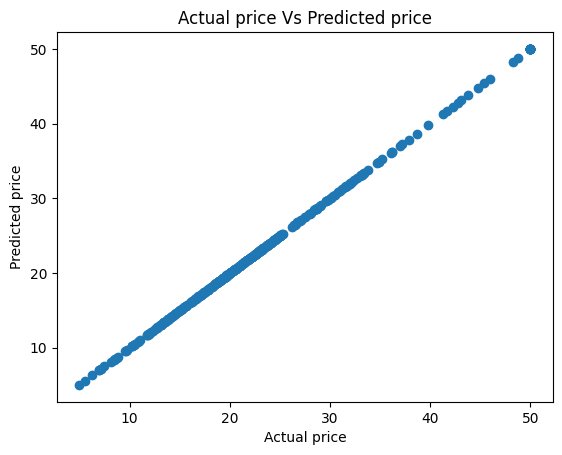

In [20]:
# visualize the plot of Y_train and training data prediction
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("Actual price Vs Predicted price")
plt.show()

In [21]:
# predction on test data

#accuracy
test_data_prediction= model.predict(X_test)


In [22]:
# R square

score_2= metrics.r2_score(Y_test,test_data_prediction)
#mean absolute error
score_3= metrics.mean_absolute_error(Y_test,test_data_prediction)
print("R squared error:",score_2)
print("Mean absolute Error:",score_3)

R squared error: 0.8711660369151691
Mean absolute Error: 2.2834744154238233
